In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.drop('Serial No.', axis=1, inplace=True)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
model = KNeighborsClassifier()

In [7]:
y = data['Chance of Admit ']
x = data.drop('Chance of Admit ', axis=1)

In [8]:
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size = 0.40,random_state = 101)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])



y_train_01 = [1 if each > 0.7 else 0 for each in y_train]
y_test_01  = [1 if each > 0.7 else 0 for each in y_test]

# list to array to fit into sklearn models
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [10]:
model = KNeighborsClassifier()
model.fit(x_train,y_train_01)

print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(model.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(model.predict(x_test.iloc[[2],:])))


real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [0]


In [11]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01,model.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29


from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,model.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,model.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,model.predict(x_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test_01,model.predict(x_test)))

precision_score:  0.8888888888888888
recall_score:  0.8089887640449438
f1_score:  0.8470588235294118
             precision    recall  f1-score   support

          0       0.78      0.87      0.83        71
          1       0.89      0.81      0.85        89

avg / total       0.84      0.84      0.84       160



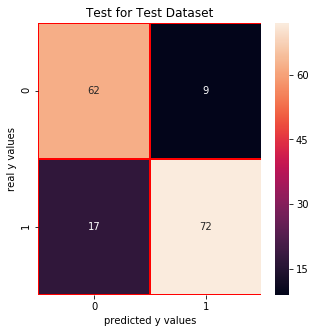

In [12]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [13]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train_01)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test_01))

Text(0,0.5,'Error Rate')

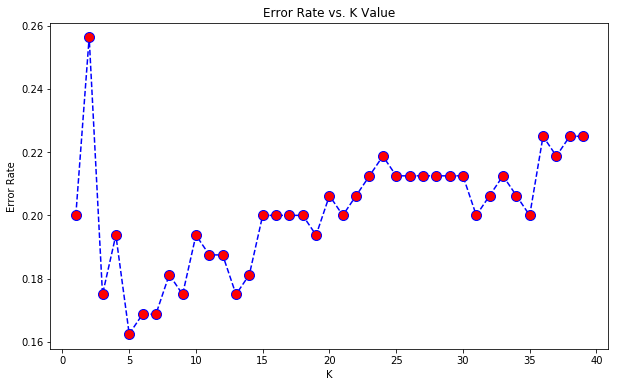

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')